
## Total Process: 
### Part-0:  Fire the System

    Steps#0 :- Fire the System-- Import Libraries

### Part-1 : Data Pre-Processing

    Steps#1 :- Read Data
    Steps#2 :- Data Pre-Processing(shaping and Transform)

### Part-2 : Create a Model  and Train it

    Steps#3 :- Building-up the Lstm based Neural Network
    Steps#4 :-Start Training

### Part-3 : Make Future Prediction


    Steps#5 :-  Make Predictions for Future Dates
    Steps#6 :- Visualize the Predictions

*`Steps#0 :- Fire The System`*

In [ ]:
#importing Libraries
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
import datetime as dt


In [ ]:
#Plotting Style set
plt.style.use('fivethirtyeight')

*`Steps#1 :- Read Data`*

In [ ]:
#Downloadad  Data from API

#Ticker Symbol
company = 'TSLA'
#Start and End Time 
start = dt.datetime(2012,1,1)
end = dt.datetime.now()

actual_data = web.DataReader(company, 'yahoo', start, end)
actual_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.900000,5.530000,5.788000,5.616000,4640500.0,5.616000
2012-01-04,5.734000,5.500000,5.642000,5.542000,3150500.0,5.542000
2012-01-05,5.586000,5.370000,5.552000,5.424000,5027500.0,5.424000
2012-01-06,5.558000,5.282000,5.440000,5.382000,4931500.0,5.382000
2012-01-09,5.498000,5.224000,5.400000,5.450000,4485000.0,5.450000
...,...,...,...,...,...,...
2021-05-04,683.450012,657.700012,678.940002,673.599976,29739300.0,673.599976
2021-05-05,685.299988,667.340027,681.059998,670.940002,21901900.0,670.940002
2021-05-06,681.020020,650.000000,680.760010,663.539978,27784600.0,663.539978


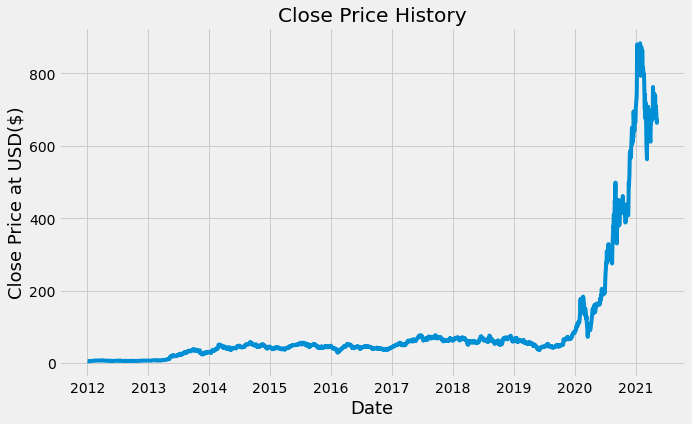

In [ ]:
#Ploting the graph using Matplotlib
plt.figure(figsize=(10,6))
plt.title('Close Price History')
plt.plot(actual_data['Close'])
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Close Price at USD($)', fontsize = 18)
plt.show()

*`Steps#2 :- Data Pre-Processing Shaping and Transform`*

In [ ]:
#create New Data Frame // Filtering unwanted data
filter_data = actual_data.filter(['Close'])
#Convert Data Frame into Numpy Array dataset
dataset = filter_data.values
#get the number of rows and columns to train the model on
training_data_length = math.ceil(len(dataset) * .8)

training_data_length

1882

In [ ]:
#Scale the Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00120428],
       [0.00112005],
       [0.00098573],
       ...,
       [0.7585176 ],
       [0.75009443],
       [0.7601453 ]])

In [ ]:
#Create a training Data Set
train_data = scaled_data[0: training_data_length, :]

#split training data into two list x_train and y_train
x_train = []
y_train = []

n_past = 60 # no of past day to look back to predict
n_future = 1 #no of days to predict in future

for i in range(n_past, len(train_data)):
  x_train.append(train_data[i-n_past :i, 0])
  y_train.append(train_data[i + n_future -1 : i + n_future,0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.00120428, 0.00112005, 0.00098573, 0.00093793, 0.00101533,
       0.00109956, 0.00123843, 0.00124298, 0.        , 0.00086736,
       0.00091516, 0.00090378, 0.00086736, 0.00090606, 0.00105403,
       0.00117924, 0.00140006, 0.00148885, 0.00154348, 0.00142966,
       0.00154576, 0.00169829, 0.00190317, 0.00205115, 0.00200562,
       0.00208074, 0.00222872, 0.00189179, 0.00198058, 0.00236303,
       0.00246092, 0.00259296, 0.00277281, 0.00266581, 0.00260207,
       0.00267264, 0.00249507, 0.00246548, 0.00250873, 0.00241767,
       0.00264532, 0.00256109, 0.00249962, 0.00234937, 0.00235165,
       0.00234027, 0.00272045, 0.00300957, 0.00302778, 0.00284566,
       0.00277964, 0.00285249, 0.00277508, 0.00277053, 0.00281378,
       0.00264305, 0.0025702 , 0.003326  , 0.00344893, 0.00342845])]
[array([0.00331007])]

[array([0.00120428, 0.00112005, 0.00098573, 0.00093793, 0.00101533,
       0.00109956, 0.00123843, 0.00124298, 0.        , 0.00086736,
       0.00091516, 0.00090378, 0.00

In [ ]:
# convert scaled training x_train and y_train data set into numpy array
x_train, y_train = np.array(x_train),np.array(y_train)

x_train,y_train
print('Shape of x_train == {}'.format(x_train.shape))
print('Shape of x_train == {}'.format(y_train.shape))

Shape of x_train == (1822, 60)
Shape of x_train == (1822, 1)


In [ ]:
#reshape the train data set
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1822, 60, 1)

*`Steps#3 :- Building The LSTM neural Network`*

In [ ]:
#Train LSTM Model / Build LSTM MOdel
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#compile the LSTM model
model.compile(optimizer='adam',loss = 'mean_squared_error')

*`Steps#4 :- Start Training`*

In [ ]:
#train the model
model.fit(x_train,y_train, batch_size= 50, epochs=10)

Epoch 1/10
37/37 [==============================] - 6s 60ms/step - loss: 4.0596e-04
Epoch 2/10
37/37 [==============================] - 2s 62ms/step - loss: 1.9138e-05
Epoch 3/10
37/37 [==============================] - 2s 62ms/step - loss: 1.1518e-05
Epoch 4/10
37/37 [==============================] - 2s 61ms/step - loss: 1.1189e-05
Epoch 5/10
37/37 [==============================] - 2s 63ms/step - loss: 1.2348e-05
Epoch 6/10
37/37 [==============================] - 2s 61ms/step - loss: 1.1235e-05
Epoch 7/10
37/37 [==============================] - 2s 62ms/step - loss: 1.1069e-05
Epoch 8/10
37/37 [==============================] - 2s 62ms/step - loss: 1.0007e-05
Epoch 9/10
37/37 [==============================] - 2s 62ms/step - loss: 1.0587e-05
Epoch 10/10
37/37 [==============================] - 2s 62ms/step - loss: 9.7865e-06


*`Steps#5 :- Make Prediction for Future Days`*

In [ ]:
#dataset for prediction
#create new array containing scaled value from 1543 to 2003 index
test_data = scaled_data[training_data_length - 60 : , :]
#cared data sets for test datas x_test, y_test
x_test = []
y_test = dataset[training_data_length : , :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
#create this test data dataset into  an numpy array
x_test = np.array(x_test)
x_test

array([[0.05989309, 0.06124307, 0.05577258, ..., 0.045724  , 0.04484071,
        0.04472916],
       [0.06124307, 0.05577258, 0.05740713, ..., 0.04484071, 0.04472916,
        0.04554188],
       [0.05577258, 0.05740713, 0.05700646, ..., 0.04472916, 0.04554188,
        0.04568303],
       ...,
       [0.97761033, 0.96172023, 0.91090818, ..., 0.8023407 , 0.77440777,
        0.76154535],
       [0.96172023, 0.91090818, 0.91869385, ..., 0.77440777, 0.76154535,
        0.7585176 ],
       [0.91090818, 0.91869385, 0.92377053, ..., 0.76154535, 0.7585176 ,
        0.75009443]])

In [ ]:
#reshape the test data
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
x_test.shape

(470, 60, 1)

In [ ]:
#get the models predicted value
prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction)

In [ ]:
#get the RMSE (root square mean error)
rmse = np.sqrt(np.mean(prediction - y_test)** 2)
rmse

35.04544172084078

*`Steps#6 :- Visualize the Prediction`*

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


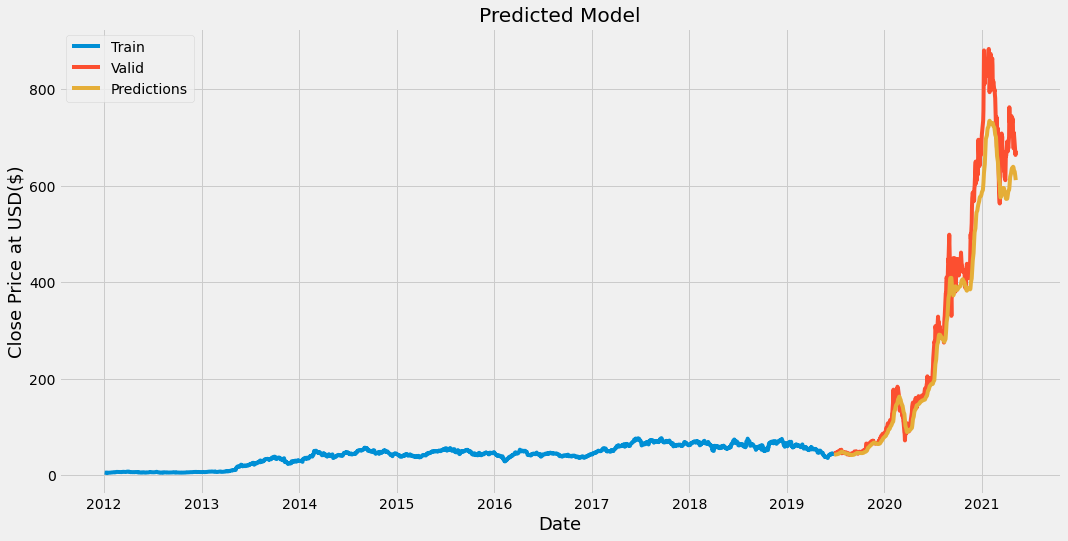

In [ ]:
#plot the predicteed data
train = actual_data[: training_data_length]
valid = actual_data[training_data_length : ]
valid['Predictions'] = prediction
#visualize the model
plt.figure(figsize=(16,8))
plt.title('Predicted Model')
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Close Price at USD($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Valid','Predictions'],loc = 'upper left')
plt.show()

In [ ]:
#show valid and Predicted prices
valid

,High,Low,Open,Close,Volume,Adj Close,Predictions
Date,,,,,,,
2019-06-05,40.256001,38.369999,39.736000,39.318001,67554000.0,39.318001,36.785694
2019-06-06,42.200001,40.360001,40.888000,41.189999,101211000.0,41.189999,36.545040
2019-06-07,42.167999,40.700001,41.000000,40.900002,80017500.0,40.900002,36.544220
2019-06-10,43.388000,41.801998,42.049999,42.576000,52925000.0,42.576000,36.680115
2019-06-11,44.180000,42.700001,43.827999,43.419998,58267500.0,43.419998,36.989395
...,...,...,...,...,...,...,...
2021-04-05,708.159973,684.700012,707.710022,691.049988,41842800.0,691.049988,585.785889
2021-04-06,696.549988,681.369995,690.299988,691.619995,28271800.0,691.619995,588.170593
2021-04-07,691.380005,667.840027,687.000000,670.969971,26309400.0,670.969971,591.878601


In [ ]:
#Predicted Data
prediction

array([[ 42.501175],
       [ 42.597862],
       [ 42.688656],
       [ 42.819664],
       [ 42.932316],
       [ 43.16385 ],
       [ 43.43096 ],
       [ 43.66446 ],
       [ 43.85594 ],
       [ 44.126003],
       [ 44.423454],
       [ 44.804295],
       [ 45.32457 ],
       [ 45.882286],
       [ 46.457626],
       [ 46.986305],
       [ 47.510777],
       [ 47.96333 ],
       [ 48.399364],
       [ 48.85868 ],
       [ 48.81864 ],
       [ 48.45264 ],
       [ 48.010616],
       [ 47.6407  ],
       [ 47.335094],
       [ 46.987316],
       [ 46.642117],
       [ 46.24094 ],
       [ 45.86344 ],
       [ 45.56239 ],
       [ 45.395508],
       [ 45.2805  ],
       [ 45.124554],
       [ 45.032337],
       [ 44.780693],
       [ 44.390793],
       [ 43.997902],
       [ 43.723637],
       [ 43.53139 ],
       [ 43.336685],
       [ 43.17066 ],
       [ 42.88988 ],
       [ 42.603115],
       [ 42.32051 ],
       [ 42.080532],
       [ 41.96639 ],
       [ 41.992413],
       [ 42.0

In [ ]:
valid.to_csv('data_frame.csv',header=True)